# Notebook 01: Data Loading and Overview

## Purpose
This notebook serves as the initial exploration phase of this project, (I will be exploring the (MinoAI) dataset). The goal is to:
- Load the (MinoAI) dataset
- Understand the structure and composition of the data
- Identify data types and initial quality issues
- Generate summary statistics

## Learning Objectives
- Demonstrate systematic approach to exploring unknown datasets
- Identify numerical and categorical features
- Detect missing values and potential data quality issues

---
## 1. Import Required Libraries

In [ ]:
# Data manipulation and analysis
# pd is used for data handling
import pandas as pd 
# np is used for numerical operations
import numpy as np

# Data visualization
# plt/sns is used for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.4.0


---
## 2. Load the Dataset

I load the dataset from the `data/` directory. This dataset contains information about Airbnb listings in New York City.

In [11]:
# Load the dataset
df = pd.read_csv('../data/MinoAI_dataset.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of observations: {df.shape[0]:,}")
print(f"Number of variables: {df.shape[1]}")

Dataset loaded successfully!
Dataset shape: (48895, 16)
Number of observations: 48,895
Number of variables: 16


The dataset contains 48895 observations and 16 variables, indicating a moderately sized structured dataset suitable for exploratory data analysis and machine learning tasks.

---
## 3. Initial Data Inspection

### 3.1 First Few Rows
Examining the first few rows helps us understand the structure and content of the dataset.

In [8]:
# Display first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/5/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/7/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


### 3.2 Last Few Rows
Checking the last rows ensures data consistency throughout the dataset.

In [12]:
# Display last 5 rows
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### 3.3 Random Sample
Viewing random samples provides a better overall picture of the data.

In [14]:
# Display 10 random rows
df.sample(10, random_state=42)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
879,317905,Come and go as you please in BKLN!,1631733,Jane,Brooklyn,Kensington,40.64354,-73.97777,Entire home/apt,89,3,62,2/1/2019,0.71,1,189
44383,34205267,"Spacious, sunny room in Queens/Brooklyn",913940,Giancarlo,Queens,Ridgewood,40.70666,-73.90779,Private room,30,21,0,NaN,NaN,1,73
15394,12342297,Private bedroom in high-ceiling 4BR apartment!,19953913,Alejandro,Manhattan,Hell's Kitchen,40.76116,-73.99016,Private room,120,2,17,28/4/2017,0.43,1,0
43230,33527778,Sonder | Stock Exchange | Stunning 3BR + Kitchen,219517861,Sonder (NYC),Manhattan,Financial District,40.70763,-74.01050,Entire home/apt,470,2,5,2/6/2019,1.88,327,272
16332,13136376,Spacious 2 Bedroom with Balcony,16110448,Gingie,Manhattan,East Harlem,40.79658,-73.93287,Entire home/apt,199,2,30,3/6/2019,0.80,1,30
5966,4365276,Entire 2BR APT (not a railroad),3081990,Amanda,Brooklyn,Williamsburg,40.70698,-73.95406,Entire home/apt,170,1,141,22/6/2019,3.05,1,28
29838,22968206,1br in spacious 2 br in the heart of Williamsburg,22748648,Hugo,Brooklyn,Williamsburg,40.71246,-73.96133,Private room,90,5,1,21/2/2018,0.06,1,0
41764,32472023,comfortable Place to live,209376540,Jing,Queens,College Point,40.76813,-73.84542,Entire home/apt,60,30,0,NaN,NaN,1,121
11118,8609130,Great Nolita Apartment!,2520559,Victoria,Manhattan,SoHo,40.72214,-73.99793,Entire home/apt,150,2,89,2/6/2019,1.94,1,55
31800,24806106,â€œStudioâ€ ideally located across Golf Course,132669029,Edwin,Bronx,Throgs Neck,40.81437,-73.82774,Entire home/apt,74,2,37,13/6/2019,2.63,4,70


---
## 4. Dataset Information

### 4.1 Column Names and Data Types

In [17]:
# Display dataset information
print("Dataset Information:")
print("="*80)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review

### 4.2 Column List

In [ ]:
# List all columns
print("Column Names:")
print("="*80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")
# df.columns

Column Names:
 1. id
 2. name
 3. host_id
 4. host_name
 5. neighbourhood_group
 6. neighbourhood
 7. latitude
 8. longitude
 9. room_type
10. price
11. minimum_nights
12. number_of_reviews
13. last_review
14. reviews_per_month
15. calculated_host_listings_count
16. availability_365


Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

---
## 5. Data Type Classification

Identifying numerical and categorical features is crucial for subsequent analysis.
#### This reveals:
- Numerical vs categorical columns

In [23]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("NUMERICAL COLUMNS:")
print("="*80)
for i, col in enumerate(numerical_cols, 1):
    print(f"{i:2d}. {col}")

print("\nCATEGORICAL COLUMNS:")
print("="*80)
for i, col in enumerate(categorical_cols, 1):
    print(f"{i:2d}. {col}")

print(f"\nTotal Numerical: {len(numerical_cols)}")
print(f"Total Categorical: {len(categorical_cols)}")

NUMERICAL COLUMNS:
 1. id
 2. host_id
 3. latitude
 4. longitude
 5. price
 6. minimum_nights
 7. number_of_reviews
 8. reviews_per_month
 9. calculated_host_listings_count
10. availability_365

CATEGORICAL COLUMNS:
 1. name
 2. host_name
 3. neighbourhood_group
 4. neighbourhood
 5. room_type
 6. last_review

Total Numerical: 10
Total Categorical: 6


---
## 6. Summary Statistics

### 6.1 Numerical Features
Summary statistics provide insight into the distribution and spread of numerical variables, helping to identify anomalies and potential outliers.


In [24]:
# Statistical summary of numerical features
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### 6.2 Categorical Features

In [25]:
# Statistical summary of categorical features
df.describe(include=['object'])

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47896,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,23/6/2019
freq,18,417,21661,3920,25409,1413


---
## 7. Missing Values Analysis

Identifying missing values is critical for data cleaning in the next notebook.

In [26]:
# Count missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a summary dataframe
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

# Sort by missing count (descending)
missing_summary = missing_summary.sort_values('Missing_Count', ascending=False)

# Display only columns with missing values
print("MISSING VALUES SUMMARY:")
print("="*80)
missing_summary[missing_summary['Missing_Count'] > 0]

MISSING VALUES SUMMARY:


,Column,Missing_Count,Missing_Percentage
12,last_review,10052,20.558339
13,reviews_per_month,10052,20.558339
3,host_name,21,0.042949
1,name,16,0.032723


This shows that several variables contain missing values like the last_review and reviews_per_month. These will be handled using multiple imputation techniques, including forward fill, backward fill, interpolation, and mean imputation, in subsequent notebooks.

In [28]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### 7.1 Visualize Missing Values

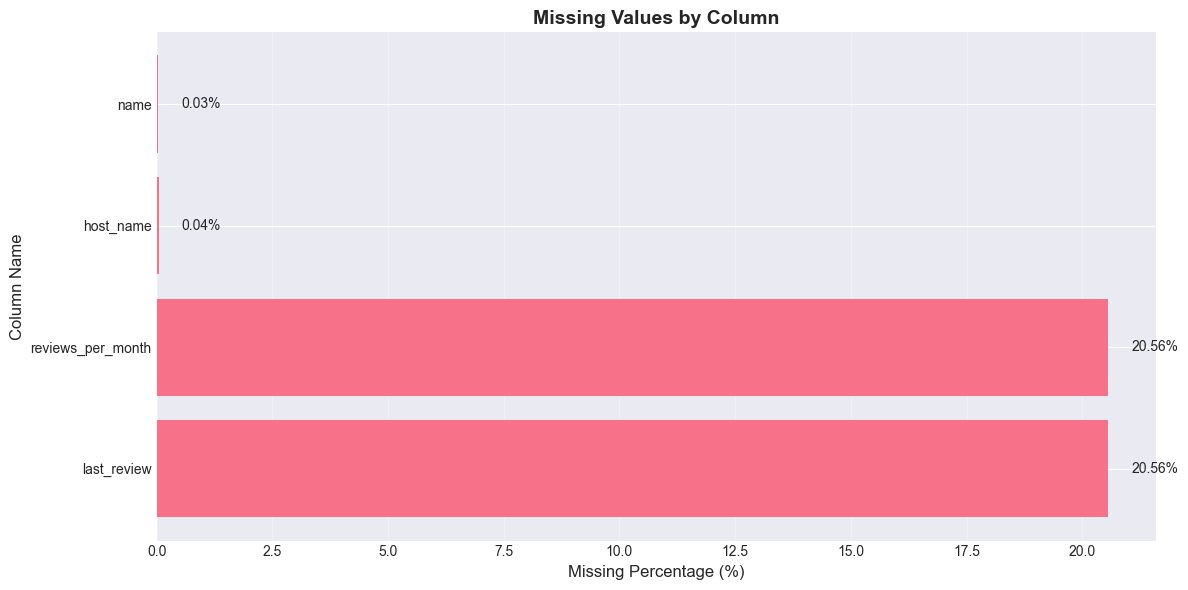

In [29]:
# Visualize missing values
plt.figure(figsize=(12, 6))

# Filter columns with missing values
cols_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]

if len(cols_with_missing) > 0:
    plt.barh(cols_with_missing['Column'], cols_with_missing['Missing_Percentage'])
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Column Name', fontsize=12)
    plt.title('Missing Values by Column', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add percentage labels
    for i, (col, pct) in enumerate(zip(cols_with_missing['Column'], cols_with_missing['Missing_Percentage'])):
        plt.text(pct + 0.5, i, f'{pct:.2f}%', va='center')
    
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset!")

---
## 8. Unique Values Analysis

Understanding the cardinality of categorical features helps in feature engineering.

In [30]:
# Analyze unique values for each column
unique_summary = pd.DataFrame({
    'Column': df.columns,
    'Unique_Count': [df[col].nunique() for col in df.columns],
    'Data_Type': df.dtypes.values
})

print("UNIQUE VALUES SUMMARY:")
print("="*80)
unique_summary

UNIQUE VALUES SUMMARY:


,Column,Unique_Count,Data_Type
0,id,48895,int64
1,name,47896,object
2,host_id,37457,int64
3,host_name,11452,object
4,neighbourhood_group,5,object
5,neighbourhood,221,object
6,latitude,19048,float64
7,longitude,14718,float64
8,room_type,3,object
9,price,674,int64


### 8.1 Categorical Feature Distribution

In [31]:
# Display unique values for key categorical columns
key_categorical = ['neighbourhood_group', 'room_type']

for col in key_categorical:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print("="*80)
        print(df[col].value_counts())
        print(f"\nUnique values: {df[col].nunique()}")


NEIGHBOURHOOD_GROUP:
neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

Unique values: 5

ROOM_TYPE:
room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

Unique values: 3


---
## 9. Initial Observations and Insights

### Key Findings:

Based on our initial exploration, we can make the following observations:

1. **Dataset Size**: The dataset contains (48,895) approximately 49,000 Airbnb listings.

2. **Features**: We have 16 variables including:
   - Listing identifiers (id, name)
   - Host information (host_id, host_name)
   - Location data (neighbourhood_group, neighbourhood, latitude, longitude)
   - Property characteristics (room_type, price, minimum_nights)
   - Review metrics (number_of_reviews, last_review, reviews_per_month)
   - Availability (availability_365)

3. **Missing Values**: Several columns contain missing values, particularly:
   - `last_review` and `reviews_per_month` (likely for listings with no reviews)
   - `name` and `host_name` (some missing text data)

4. **Data Types**: 
   - Numerical features: price, minimum_nights, number_of_reviews, etc.
   - Categorical features: neighbourhood_group, room_type, etc.
   - Text features: name, host_name

5. **Potential Issues**:
   - Date column (`last_review`) is stored as object/string, needs conversion
   - Missing values need to be handled appropriately
   - Potential outliers in price and other numerical features

### Next Steps:
In the next notebook (02_data_cleaning.ipynb), we will:
- Handle missing values using multiple techniques (forward fill, backward fill, interpolation, mean imputation)
- Convert data types where necessary
- Check for and remove duplicates
- Prepare the dataset for exploratory data analysis

---
## 10. Save Summary Information

We'll save key information for reference in subsequent notebooks.

In [32]:
# Save column information
print("Dataset Overview Summary:")
print("="*80)
print(f"Total Rows: {df.shape[0]:,}")
print(f"Total Columns: {df.shape[1]}")
print(f"Numerical Columns: {len(numerical_cols)}")
print(f"Categorical Columns: {len(categorical_cols)}")
print(f"Columns with Missing Values: {(missing_values > 0).sum()}")
print(f"Total Missing Values: {missing_values.sum():,}")
print(f"Missing Data Percentage: {(missing_values.sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Dataset Overview Summary:
Total Rows: 48,895
Total Columns: 16
Numerical Columns: 10
Categorical Columns: 6
Columns with Missing Values: 4
Total Missing Values: 20,141
Missing Data Percentage: 2.57%


---
## Conclusion

This notebook has successfully:
- Loaded the Airbnb dataset
- Examined the structure and composition of the data
- Identified numerical and categorical features
- Detected missing values and their distribution
- Generated summary statistics
- Documented initial observations

The dataset is now ready for the data cleaning phase in the next notebook.

---
**Next Notebook**: [02_data_cleaning.ipynb](02_data_cleaning.ipynb)